<a href="https://colab.research.google.com/github/chaeyunyeo/2022-2-Euron-Study-Assignment/blob/week7/euron_7%EC%A3%BC%EC%B0%A8_%EC%98%88%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EC%97%AC%EC%B1%84%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 다양한 차원 축소 기법들

In [32]:
import pandas as pd
import numpy as np

In [33]:
train = pd.read_csv('/content/gdrive/MyDrive/euron study/csv파일/train_week7.csv')
target = train['target']
train = train.drop(["target", "ID"], axis=1)

print ("Rows: " + str(train.shape[0]) + ", Columns: " + str(train.shape[1]))
train.head()

Rows: 4459, Columns: 4991


,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [34]:
from sklearn.preprocessing import StandardScaler

standardized_train = StandardScaler().fit_transform(train.values)


In [35]:
feature_df = train.describe().T
feature_df = feature_df.reset_index().rename(columns = {'index' : 'columns'})
feature_df['distinct_vals'] = feature_df['columns'].apply(lambda x : len(train[x].value_counts()))
feature_df['column_var'] = feature_df['columns'].apply(lambda x : np.var(train[x]))
feature_df['column_std'] = feature_df['columns'].apply(lambda x : np.std(train[x]))
feature_df['column_mean'] = feature_df['columns'].apply(lambda x : np.mean(train[x]))
feature_df['target_corr'] = feature_df['columns'].apply(lambda x : np.corrcoef(target, train[x])[0][1])
feature_df.head()

,columns,count,mean,std,min,25%,50%,75%,max,distinct_vals,column_var,column_std,column_mean,target_corr
0,48df886f9,4459.0,14654.930101,3.893298e+05,0.0,0.0,0.0,0.0,20000000.0,32,1.515437e+11,3.892862e+05,14654.930101,0.010188
1,0deb4b6a8,4459.0,1390.894819,6.428302e+04,0.0,0.0,0.0,0.0,4000000.0,5,4.131381e+09,6.427582e+04,1390.894819,0.013805
2,34b15f335,4459.0,26722.450922,5.699652e+05,0.0,0.0,0.0,0.0,20000000.0,29,3.247875e+11,5.699013e+05,26722.450922,0.014694
3,a8cb14b00,4459.0,4530.163714,2.359124e+05,0.0,0.0,0.0,0.0,14800000.0,3,5.564218e+10,2.358860e+05,4530.163714,-0.002917
4,2f0771a37,4459.0,26409.957390,1.514730e+06,0.0,0.0,0.0,0.0,100000000.0,6,2.293893e+12,1.514560e+06,26409.957390,0.016647


In [36]:
len(feature_df[feature_df['column_var'].astype(float) == 0.0])

256

In [37]:
import plotly.graph_objs as go
from plotly.offline import iplot

feature_df = feature_df.sort_values('column_var', ascending = True)
feature_df['column_var'] = (feature_df['column_var'] - feature_df['column_var'].min()) / (feature_df['column_var'].max() - feature_df['column_var'].min())
trace1 = go.Scatter(x=feature_df['columns'], y=feature_df['column_var'], opacity=0.75, marker=dict(color="red"))
layout = dict(height=400, title='Feature Variance', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);


In [38]:
trace1 = go.Histogram(x=feature_df[feature_df['column_var'] <= 0.01]['column_var'], opacity=0.45, marker=dict(color="red"))
layout = dict(height=400, title='Distribution of Variable Variance <= 0.01', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

trace1 = go.Histogram(x=feature_df[feature_df['column_var'] > 0.01]['column_var'], opacity=0.45, marker=dict(color="red"))
layout = dict(height=400, title='Distribution of Variable Variance > 0.01', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [39]:
trace1 = go.Histogram(x=feature_df['target_corr'], opacity=0.45, marker=dict(color="green"))
layout = dict(height=400, title='Distribution of correlation with target', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [40]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(standardized_train, axis=0)
cov_matrix = np.cov(standardized_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)

# Individual explained variance
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
var_exp_real = [v.real for v in var_exp]

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 
cum_exp_real = [v.real for v in cum_var_exp]

## plot the variance and cumulative variance 
trace1 = go.Scatter(x=train.columns, y=var_exp_real, name="Individual Variance", opacity=0.75, marker=dict(color="red"))
trace2 = go.Scatter(x=train.columns, y=cum_exp_real, name="Cumulative Variance", opacity=0.75, marker=dict(color="blue"))
layout = dict(height=400, title='Variance Explained by Variables', legend=dict(orientation="h", x=0, y=1.2));
fig = go.Figure(data=[trace1, trace2], layout=layout);
iplot(fig);

In [41]:
def _get_number_components(model, threshold):
    component_variance = model.explained_variance_ratio_
    explained_variance = 0.0
    components = 0

    for var in component_variance:
        explained_variance += var
        components += 1
        if(explained_variance >= threshold):
            break
    return components
from sklearn.decomposition import PCA

### Get the optimal number of components
pca = PCA()
train_pca = pca.fit_transform(standardized_train)
components = _get_number_components(pca, threshold=0.85)
components

993

In [42]:
### Implement PCA 
obj_pca = model = PCA(n_components = components)
X_pca = obj_pca.fit_transform(standardized_train)

## Visualize the Components 
plot_3_components(X_pca, 'PCA - First Three Component')
plot_2_components(X_pca, 'PCA - First Two Components')

NameError: ignored

In [46]:
from sklearn.decomposition import TruncatedSVD

obj_svd = TruncatedSVD(n_components = components)
X_svd = obj_svd.fit_transform(standardized_train)

In [ ]:
### Implement Truncated SVD 
obj_svd = TruncatedSVD(n_components = components)
X_svd = obj_svd.fit_transform(standardized_train)

## Visualize the Components 
plot_3_components(X_svd, 'Truncated SVD - First three components')
plot_2_components(X_svd, 'Truncated SVD - First two components')

In [ ]:
### Implement ICA 
obj_ica = FastICA(n_components = 30)
X_ica = obj_ica.fit_transform(standardized_train)

## Visualize the Components 
plot_3_components(X_ica, 'ICA - First three components')
plot_2_components(X_ica, 'ICA - First two components')


In [ ]:
### Implement Factor Analysis 
obj_fa = FactorAnalysis(n_components = 30)
X_fa = obj_fa.fit_transform(standardized_train)

## Visualize the Components 
plot_3_components(X_fa, 'Factor Analysis - First three components')
# plot_2_components(X, 'Factor Analysis - First two components')

In [ ]:
### Implement NonNegative Matrix Factorization
obj = NMF(n_components = 2)
X_nmf = obj.fit_transform(train)

## Visualize the Components 
# plot_3_components(X, 'NNMF - First three components')
plot_2_components(X_nmf, 'NNMF - First two components')

In [ ]:
### Implement Gaussian Random Projection
obj_grp = GaussianRandomProjection(n_components = 30, eps=0.1)
X_grp = obj_grp.fit_transform(standardized_train)

## Visualize the Components 
plot_3_components(X_grp, 'Gaussian Random Projection - First three components')
plot_2_components(X_grp, 'Gaussian Random Projection - First two components')

In [ ]:
### Implement Sparse Random Projection
obj_srp = SparseRandomProjection(n_components = 30, eps=0.1)
X_srp = obj_srp.fit_transform(standardized_train)

## Visualize the Components 
plot_3_components(X_srp, 'Sparse Random Projection - First three components')
plot_2_components(X_srp, 'Sparse Random Projection - First two components')

In [47]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_results = tsne_model.fit_transform(X_svd)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4459 samples in 0.004s...
[t-SNE] Computed neighbors for 4459 samples in 1.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4459
[t-SNE] Computed conditional probabilities for sample 2000 / 4459
[t-SNE] Computed conditional probabilities for sample 3000 / 4459
[t-SNE] Computed conditional probabilities for sample 4000 / 4459
[t-SNE] Computed conditional probabilities for sample 4459 / 4459
[t-SNE] Mean sigma: 0.184386
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.212257
[t-SNE] KL divergence after 500 iterations: 2.749009


In [48]:
traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    name = target,
     hoveron = target,
    mode = 'markers',
    text = target,
    showlegend = True,
    marker = dict(
        size = 8,
        color = '#c94ff2',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
iplot(fig)

ValueError: ignored

In [51]:
## add the decomposed features in the train dataset
def _add_decomposition(df, decomp, ncomp, flag):
    for i in range(1, ncomp+1):
        df[flag+"_"+str(i)] = decomp[:, i - 1]

_add_decomposition(train, X_pca, 30, 'pca')
_add_decomposition(train, X_svd, 30, 'svd')
#_add_decomposition(train, X_ica, 30, 'ica')
#_add_decomposition(train, X_fa, 30, 'fa')
#_add_decomposition(train, X_grp, 30, 'grp')
#_add_decomposition(train, X_srp, 30, 'srp')

In [ ]:

## create the lists of decomposed and non decomposed features 
all_features = [x for x in train.columns if x not in ["ID", "target"]]
all_features = [x for x in all_features if "_" not in x]
decomposed_features = [x for x in train.columns if "_" in x]

## split the dataset into train test validation
target_log = np.log1p(target.values)
train_x, val_x, train_y, val_y = train_test_split(train, target_log, test_size=0.20, random_state=2018)

In [ ]:
## create a baseline model with all features 
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'rmse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}
## model without decomposed features 
train_X = lgb.Dataset(train_x[all_features], label=train_y)
val_X = lgb.Dataset(val_x[all_features], label=val_y)
model1 = lgb.train(params, train_X, 1000, val_X, verbose_eval=100, early_stopping_rounds=100)

In [ ]:
## create a model with decomposed features 
train_X = lgb.Dataset(train_x[decomposed_features], label=train_y)
val_X = lgb.Dataset(val_x[decomposed_features], label=val_y)
model2 = lgb.train(params, train_X, 3000, val_X, verbose_eval=100, early_stopping_rounds=100)

In [ ]:
## Find important features using Random Forests 
complete_features = all_features + decomposed_features
model = RandomForestRegressor(n_jobs=-1, random_state=2018)
model.fit(train[complete_features], target)
importances = model.feature_importances_

## get list of important features 
importances_df = pd.DataFrame({'importance': importances, 'feature': complete_features})
importances_df = importances_df.sort_values(by=['importance'], ascending=[False])
important_features = importances_df[:750]['feature'].values

In [ ]:
## create a model with important features   
train_X = lgb.Dataset(train_x[important_features], label=train_y)  
val_X = lgb.Dataset(val_x[important_features], label=val_y)  
model3 = lgb.train(params, train_X, 3000, val_X, verbose_eval=100, early_stopping_rounds=100)  

In [ ]:
test = pd.read_csv(path+"test.csv")
testid = test.ID.values
test = test.drop('ID', axis = 1)

In [ ]:
## obtain the components from test data
standardized_test = StandardScaler().fit_transform(test[all_features].values)
tsX_pca = obj_pca.transform(standardized_test)
tsX_svd = obj_svd.transform(standardized_test)
tsX_ica = obj_ica.transform(standardized_test)
tsX_fa  = obj_fa.transform(standardized_test)
tsX_grp = obj_grp.transform(standardized_test)
tsX_srp = obj_srp.transform(standardized_test)

In [ ]:
## add the components in test data
_add_decomposition(test, tsX_pca, 30, 'pca')
_add_decomposition(test, tsX_svd, 30, 'svd')
_add_decomposition(test, tsX_ica, 30, 'ica')
_add_decomposition(test, tsX_fa, 30, 'fa')
_add_decomposition(test, tsX_grp, 30, 'grp')
_add_decomposition(test, tsX_srp, 30, 'srp')

In [ ]:
## create submission file 
pred = np.expm1(model3.predict(test[important_features], num_iteration=model3.best_iteration))
sub = pd.DataFrame()
sub['ID'] = testid
sub['target'] = pred
sub.to_csv('submission.csv', index=False)
sub.head()

# 이미지 데이터 차원축소

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


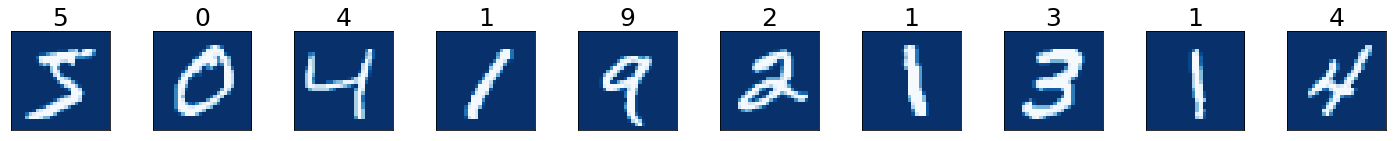

In [55]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(train_x[idx], cmap='Blues_r')
    ax.set_title(str(train_y[idx]),fontsize=25)

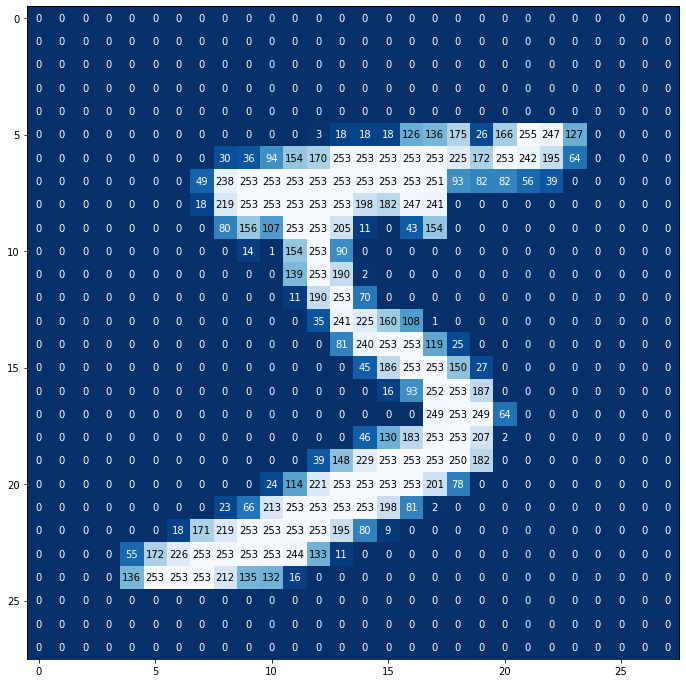

In [56]:
img = train_x[0]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [57]:
# Reshape to 2D data
train_x = train_x.reshape(train_x.shape[0], -1)
print(train_x.shape)

sample_size = 5000
# Use only the top 1000 data for training
train_x = pd.DataFrame(train_x[:sample_size, :])
train_y = train_y[:sample_size]

(60000, 784)


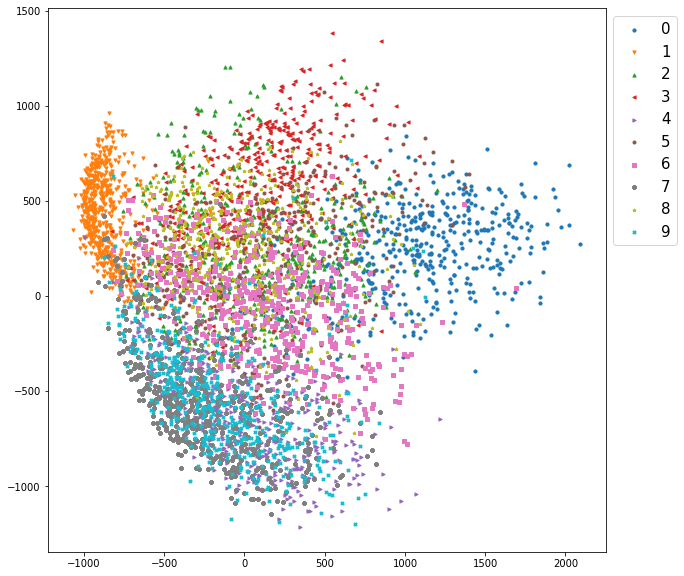

In [58]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

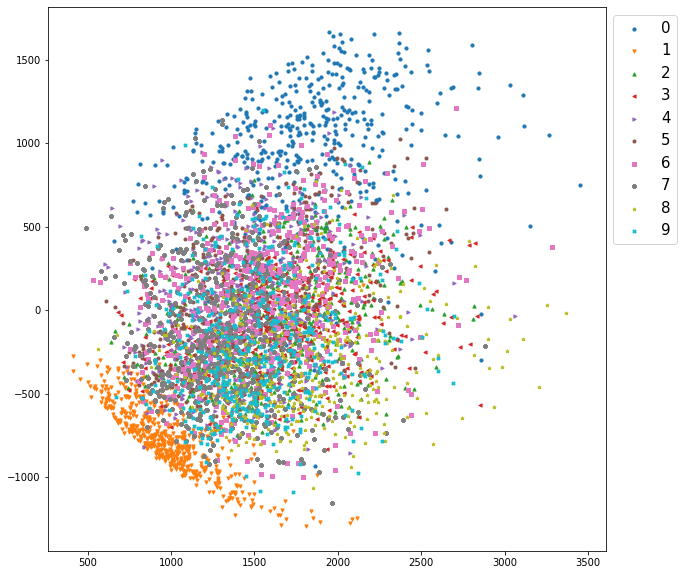

In [59]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD()
x_tsvd = tsvd.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsvd[mask, 0], x_tsvd[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

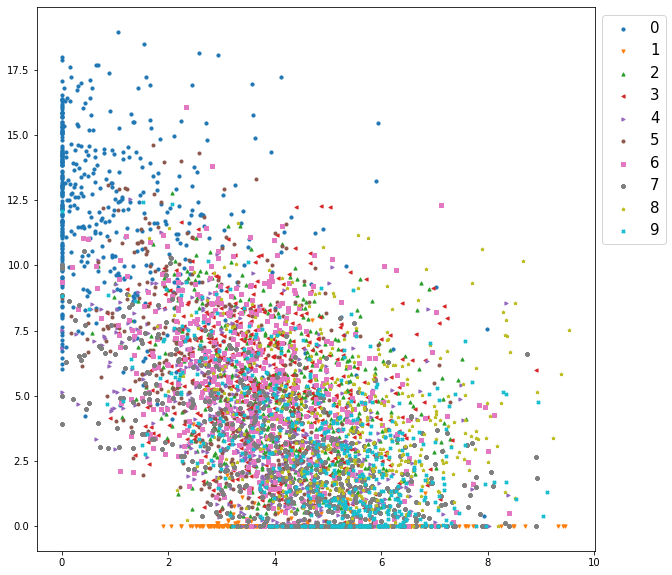

In [60]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, init='random', random_state=0)
x_nmf = nmf.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_nmf[mask, 0], x_nmf[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

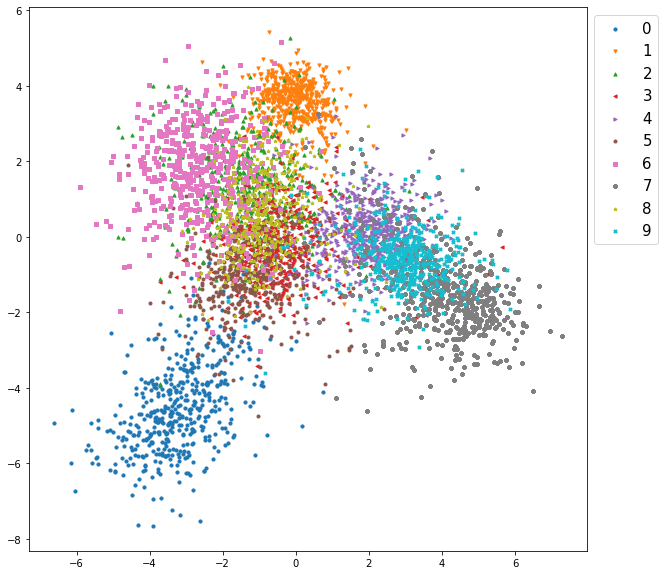

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



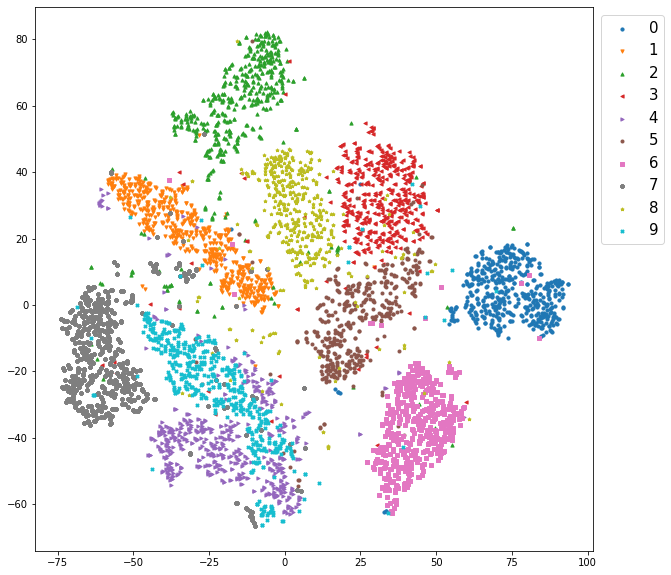

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 35.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c0054f400a7af230db34666cf2bffe89348e0195496b38c5cc880300f03eb97b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=2446916c18e1e7efa6d6d6c00ec25ceab5d4fc8b36f0f372ebeab23afdeab5ba
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


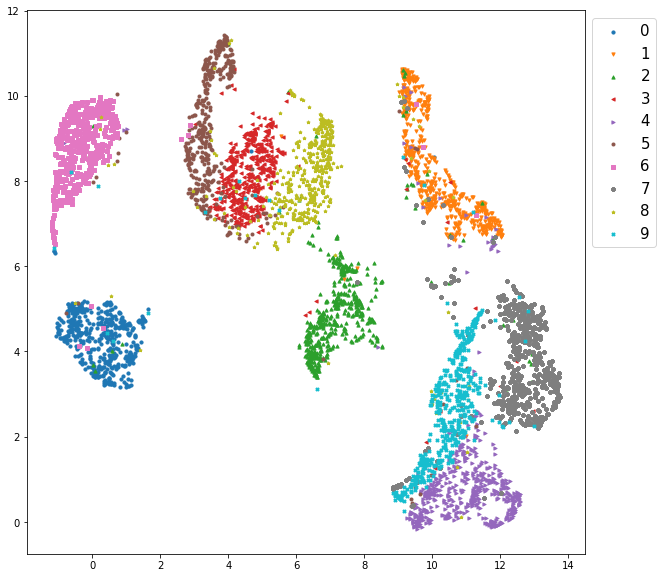

In [68]:
!pip uninstall umap
!pip install umap-learn
import umap.umap_ as umap

um = umap.UMAP()
x_umap = um.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 12.0 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=4dc3b0fa52e620225e07f287661815b4ec9f572addc335f84f84fd5647f88cf6
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape


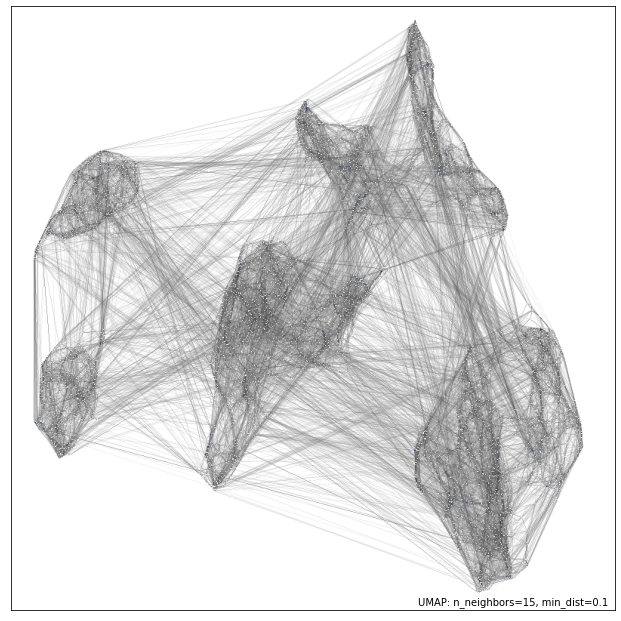

In [72]:
!pip install umap-learn[plot]

import umap.plot

mapper = umap.UMAP().fit(train_x)
umap.plot.connectivity(mapper, show_points=True)

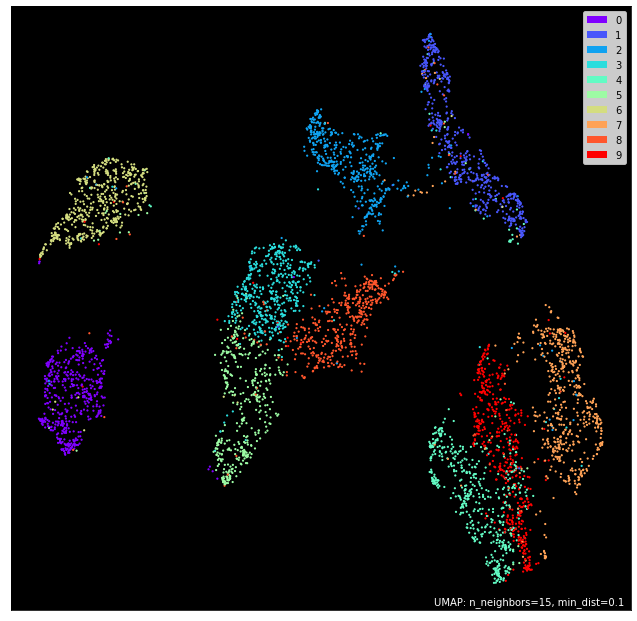

In [73]:
umap.plot.points(mapper, labels=train_y, theme='fire')


In [74]:
import plotly
import plotly.express as px
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(train_x)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(train_y,name='label')
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1)
fig.show()

<class 'numpy.ndarray'>
